<h2 style='color:blue' align='center'>Transfer learning in image classification</h2>

**In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand**

In [4]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

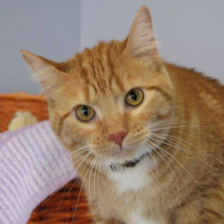

In [6]:
cat = Image.open(r"E:\DATA\dog_cat_CNN\train\cat\cat.194.jpg").resize(IMAGE_SHAPE)
cat

In [7]:
cat = np.array(cat)/255.0
cat.shape

(224, 224, 3)

In [8]:
cat[np.newaxis,...]

array([[[[0.56470588, 0.57254902, 0.63137255],
         [0.56470588, 0.57254902, 0.63137255],
         [0.56470588, 0.57254902, 0.63137255],
         ...,
         [0.63921569, 0.64705882, 0.69411765],
         [0.63529412, 0.64313725, 0.69019608],
         [0.63529412, 0.64313725, 0.69019608]],

        [[0.56470588, 0.57254902, 0.63137255],
         [0.56470588, 0.57254902, 0.63137255],
         [0.56470588, 0.57254902, 0.63137255],
         ...,
         [0.63921569, 0.64705882, 0.69411765],
         [0.64705882, 0.65490196, 0.70196078],
         [0.64705882, 0.65490196, 0.70196078]],

        [[0.56470588, 0.57254902, 0.63137255],
         [0.56470588, 0.57254902, 0.63137255],
         [0.56470588, 0.57254902, 0.63137255],
         ...,
         [0.63921569, 0.64705882, 0.69411765],
         [0.64705882, 0.65490196, 0.70196078],
         [0.64705882, 0.65490196, 0.70196078]],

        ...,

        [[0.69411765, 0.64313725, 0.74901961],
         [0.69803922, 0.64705882, 0.74901961]

In [10]:
result = classifier.predict(cat[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 696ms/step


(1, 1001)

In [12]:
predicted_label_index = np.argmax(result)
predicted_label_index

283

In [15]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 29s 0us/step


In [16]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [17]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [19]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

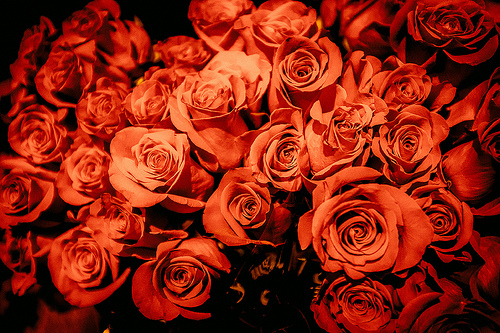

In [24]:
Image.open(str(roses[2]))

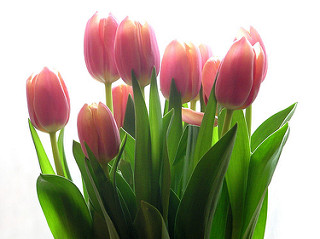

In [29]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[12]))

In [30]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [31]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [32]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [33]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [34]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [35]:
X = np.array(X)
y = np.array(y)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [38]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [39]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [40]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 43s 455ms/step - loss: 0.8271 - acc: 0.6937
Epoch 2/5
86/86 [==============================] - 38s 443ms/step - loss: 0.4245 - acc: 0.8510
Epoch 3/5
86/86 [==============================] - 37s 427ms/step - loss: 0.3302 - acc: 0.8899
Epoch 4/5
86/86 [==============================] - 38s 438ms/step - loss: 0.2779 - acc: 0.9146
Epoch 5/5
86/86 [==============================] - 41s 478ms/step - loss: 0.2386 - acc: 0.9277


In [41]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 13s 413ms/step - loss: 0.3844 - acc: 0.8573


[0.3844045102596283, 0.8572984933853149]